# Data Analysis on World Life Expectancy

World life expectancy has always been a hotspot for analysis.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### Data preprocessing

In [2]:
data1 = pd.read_csv('/Users/jiangyijia/Life_Expectancy_Data用.csv')
data1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
data2 = pd.read_csv('/Users/jiangyijia/who_life_exp.csv')
data2.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


Add a new column "region" to the data1 by the combination of data2.

In [4]:
feature = ['country', 'region']
country_region = data2[feature]
country_region = country_region.drop_duplicates()
country_region

,country,region
0,Angola,Africa
17,Burundi,Africa
34,Benin,Africa
51,Burkina Faso,Africa
68,Botswana,Africa
...,...,...
3026,Japan,Western Pacific
3043,Cambodia,Western Pacific
3060,Kiribati,Western Pacific
3077,Republic of Korea,Western Pacific


In [5]:
dic = {}
for i,j in zip(country_region['country'],country_region['region']):
    dic[i] = j
region = []
for i in data1['Country']:
    if i in dic:
        region.append(dic[i])
    else:
        region.append("Unknown")

In [6]:
data1['Region'] = region
data1.head()
data1.info()
data1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
# I'm going to adjust the columns names and remove extra spacing for ease of use
data1.rename(columns = lambda x: x.strip().replace(' ', '_').lower(), inplace=True)

# one column doesn't match our underscoring convention or the Kaggle description. fixing.
data1.rename(columns = {'thinness__1-19_years':'thinness_10-19_years'}, inplace=True)

print((f'Number of columns: {len(data1.columns)}'))
data1.columns
# that's better

Number of columns: 23


Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'region'],
      dtype='object')

In [8]:
# checking for nans
data1.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_10-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
region                               0
dtype: int64

In [9]:
# will fill nans multiple ways to see what approach is best
df1 = data1.copy() # will fill by mean
df2 = data1.copy() # will fill mean by country
df3 = data1.copy() # will fill by interpolation

In [10]:
countries = df1['country'].unique()
na_cols = ['life_expectancy', 'adult_mortality', 'alcohol', 'hepatitis_b',
           'bmi', 'polio', 'total_expenditure','diphtheria', 'gdp', 'population', 
           'thinness_10-19_years', 'thinness_5-9_years', 
           'income_composition_of_resources', 'schooling']
df1['life_expectancy'].mean()

69.22493169398908

In [11]:
# fill with overall mean
for col in na_cols:
    df1[col].fillna(df1[col].mean(), inplace=True)

In [12]:
# fill with mean by country
for col in na_cols:
    for country in countries:
        df2.loc[df2['country']== country, col] = df2.loc[df2['country'] == country, col].fillna(
            df2[df2['country'] == country][col].mean())

In [13]:
# interpolated by entire df
# due to missing values, I did not interpolate by country as there are too many missing values
for col in na_cols:
    df3.loc[:,col] = df3.loc[:,col].interpolate(limit_direction='both')

In [14]:
dfs = [data1, df1, df2, df3]
df_names = ['df', 'df1', 'df2', 'df3']

for name, df in zip(df_names, dfs):
    print('_'*60)
    print(f'nulls for {name}')
    print('_'*60)
    print(df.isnull().sum())

____________________________________________________________
nulls for df
____________________________________________________________
country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_10-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
region 

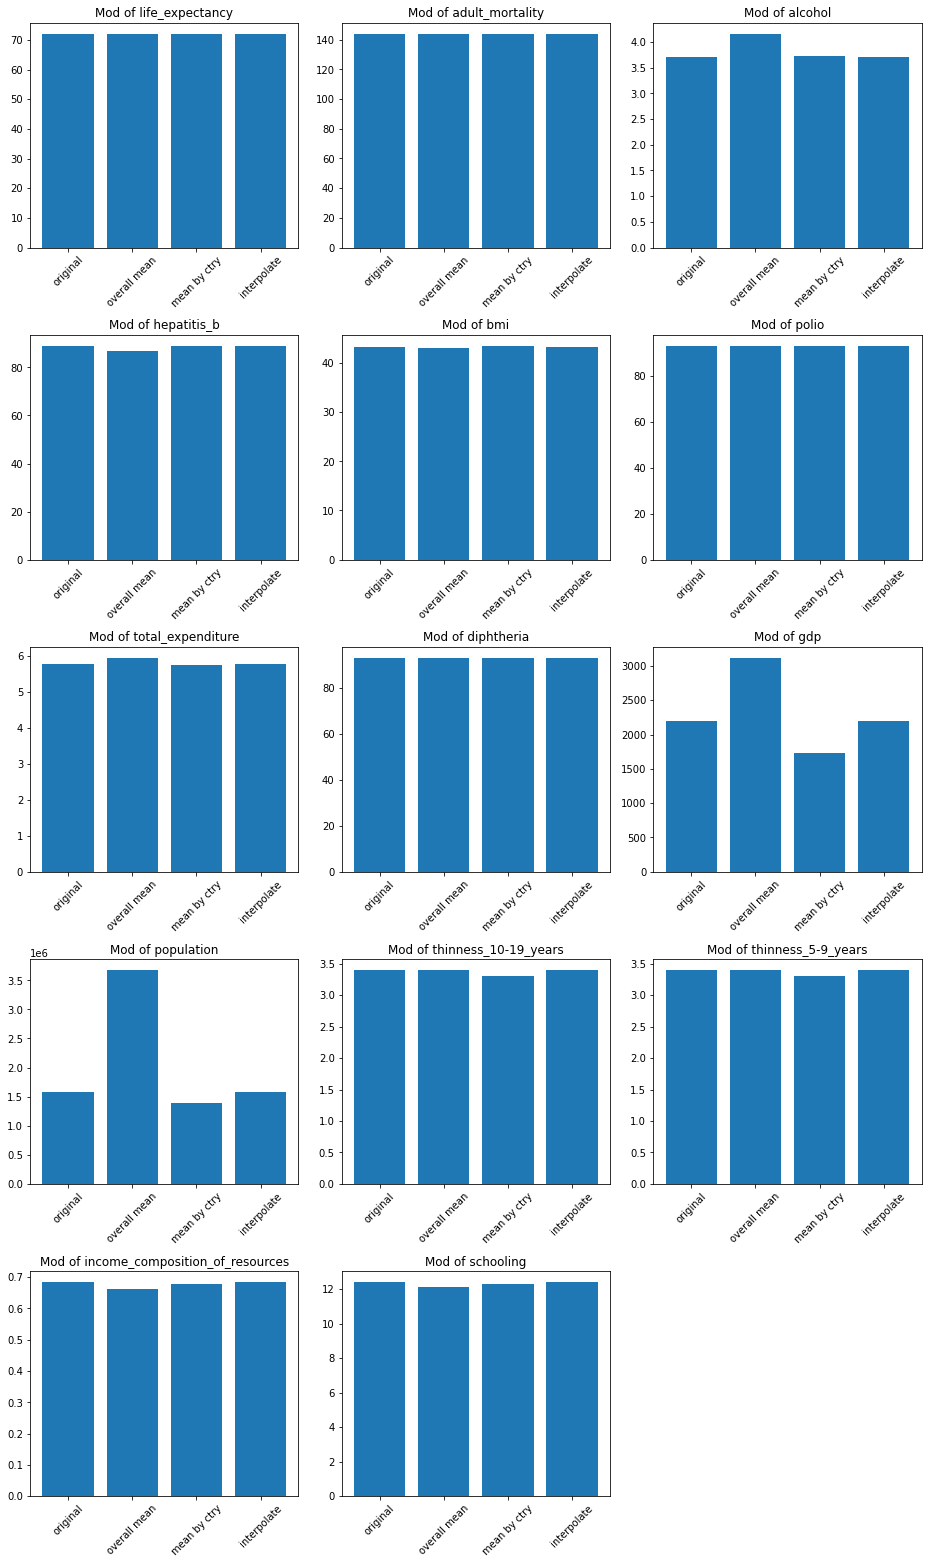

In [17]:
#plotting each method by column
import matplotlib.pyplot as plt
plt.figure(figsize=(13,60))

for i, col in enumerate(na_cols):
    df = pd.concat([data1[col], df1[col], df2[col], df3[col]], axis=1)

    plt.subplot(len(na_cols), 3, i+1)
    plt.bar(['original', 'overall mean', 'mean by ctry', 'interpolate'],df.median())
    plt.title(f'Mod of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Filling with mean by country seems to match the original data1 the closest, but that is likely because there are many nulls still left and dropping them would lose a lot of data. While interpolate seems to affect the data slightly in a few columns, it is closest to the original, and it lets us keep all observations

In [18]:
data1 = df3
data1
data1.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_10-19_years               0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
region                             0
dtype: int64

Text(0.5, 1.0, 'Correlation between different features')

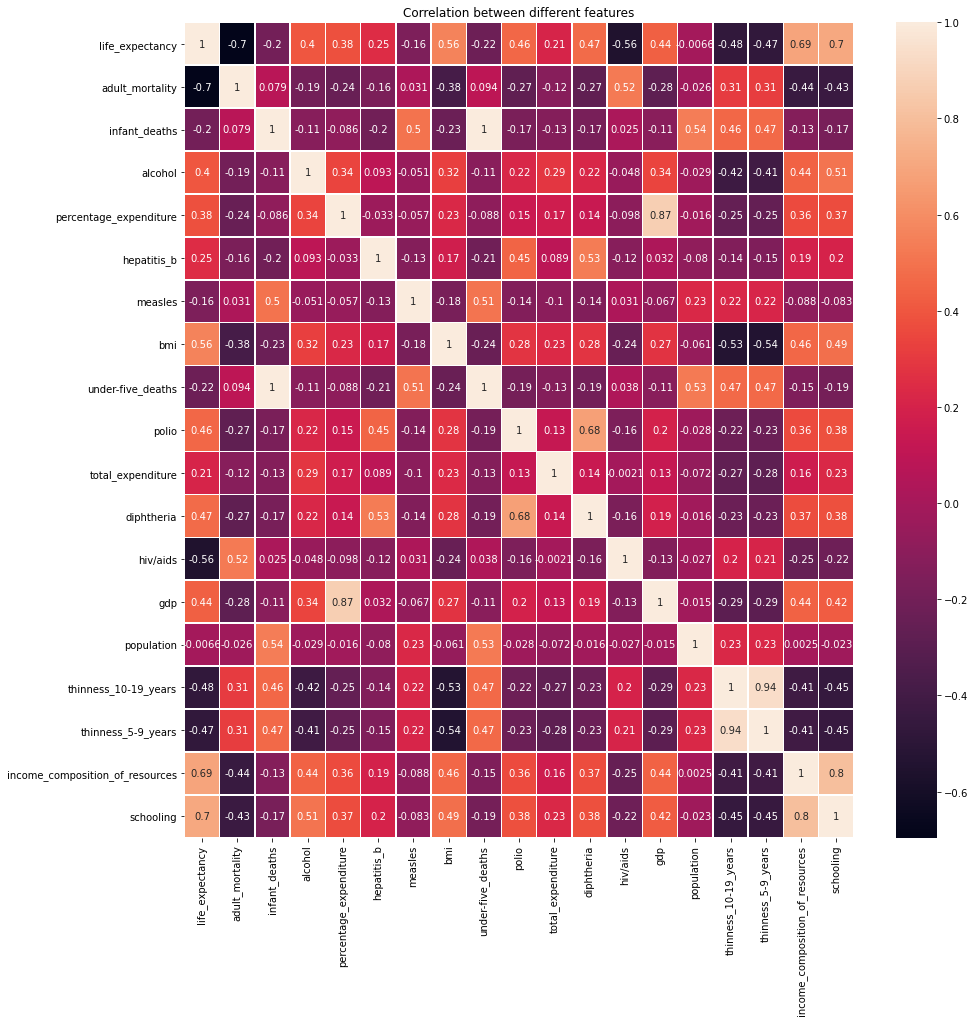

In [19]:
# Plot a heatmap showing correlation between predicting variables 
import seaborn as sns 
plt.figure(figsize=(15,15))
sns.heatmap(data1.drop(['year'], axis=1).corr(), linewidths=.5, annot=True)
plt.title('Correlation between different features')

In [20]:
# Calculate the correlation
import statsmodels.formula.api as smf
results = smf.ols('life_expectancy ~ alcohol', data=data1).fit()

def corr(data, col1, col2):
    a = data[col1].corr(data1[col2])
    if a > 0:
        print(col2 + ' has a positive correlation with ' + col1 +': '+ str(a))
    else:
        print(col2 + ' has a negative correlation with ' + col1 +': '+ str(a))

corr(data1, 'life_expectancy','adult_mortality')
corr(data1, 'life_expectancy','infant_deaths')
corr(data1, 'life_expectancy','alcohol')
corr(data1, 'life_expectancy','percentage_expenditure')
corr(data1, 'life_expectancy','hepatitis_b')
corr(data1, 'life_expectancy','measles')
corr(data1, 'life_expectancy','bmi') 
corr(data1, 'life_expectancy','under-five_deaths')
corr(data1, 'life_expectancy','polio')
corr(data1, 'life_expectancy','total_expenditure')
corr(data1, 'life_expectancy','diphtheria')
corr(data1, 'life_expectancy','hiv/aids')
corr(data1, 'life_expectancy','gdp')
corr(data1, 'life_expectancy','population') 
corr(data1, 'life_expectancy','thinness_10-19_years')
corr(data1, 'life_expectancy','thinness_5-9_years') 
corr(data1, 'life_expectancy','income_composition_of_resources')
corr(data1, 'life_expectancy','schooling') 

adult_mortality has a negative correlation with life_expectancy: -0.6957302834909396
infant_deaths has a negative correlation with life_expectancy: -0.19619746554529316
alcohol has a positive correlation with life_expectancy: 0.40031894190856654
percentage_expenditure has a positive correlation with life_expectancy: 0.3820688511205019
hepatitis_b has a positive correlation with life_expectancy: 0.24807359607994606
measles has a negative correlation with life_expectancy: -0.1572979380756175
bmi has a positive correlation with life_expectancy: 0.5564331784331534
under-five_deaths has a negative correlation with life_expectancy: -0.22215149275210005
polio has a positive correlation with life_expectancy: 0.4598646172058671
total_expenditure has a positive correlation with life_expectancy: 0.21074408988362267
diphtheria has a positive correlation with life_expectancy: 0.4740844296049732
hiv/aids has a negative correlation with life_expectancy: -0.5559287057539727
gdp has a positive correlat

In [21]:
col_dict = {'life_expectancy':1, 'adult_mortality':2, 'infant_deaths':3,
            'alcohol':4, 'percentage_expenditure':5, 'hepatitis_b':6,
            'measles':7, 'bmi':8, 'under-five_deaths':9, 'polio':10, 'total_expenditure':11,
            'diphtheria':12, 'hiv/aids':13, 'gdp':14, 'population':15,
            'thinness_10-19_years' :16, 'thinness_5-9_years' :17,
            'income_composition_of_resources':18, 'schooling':19}

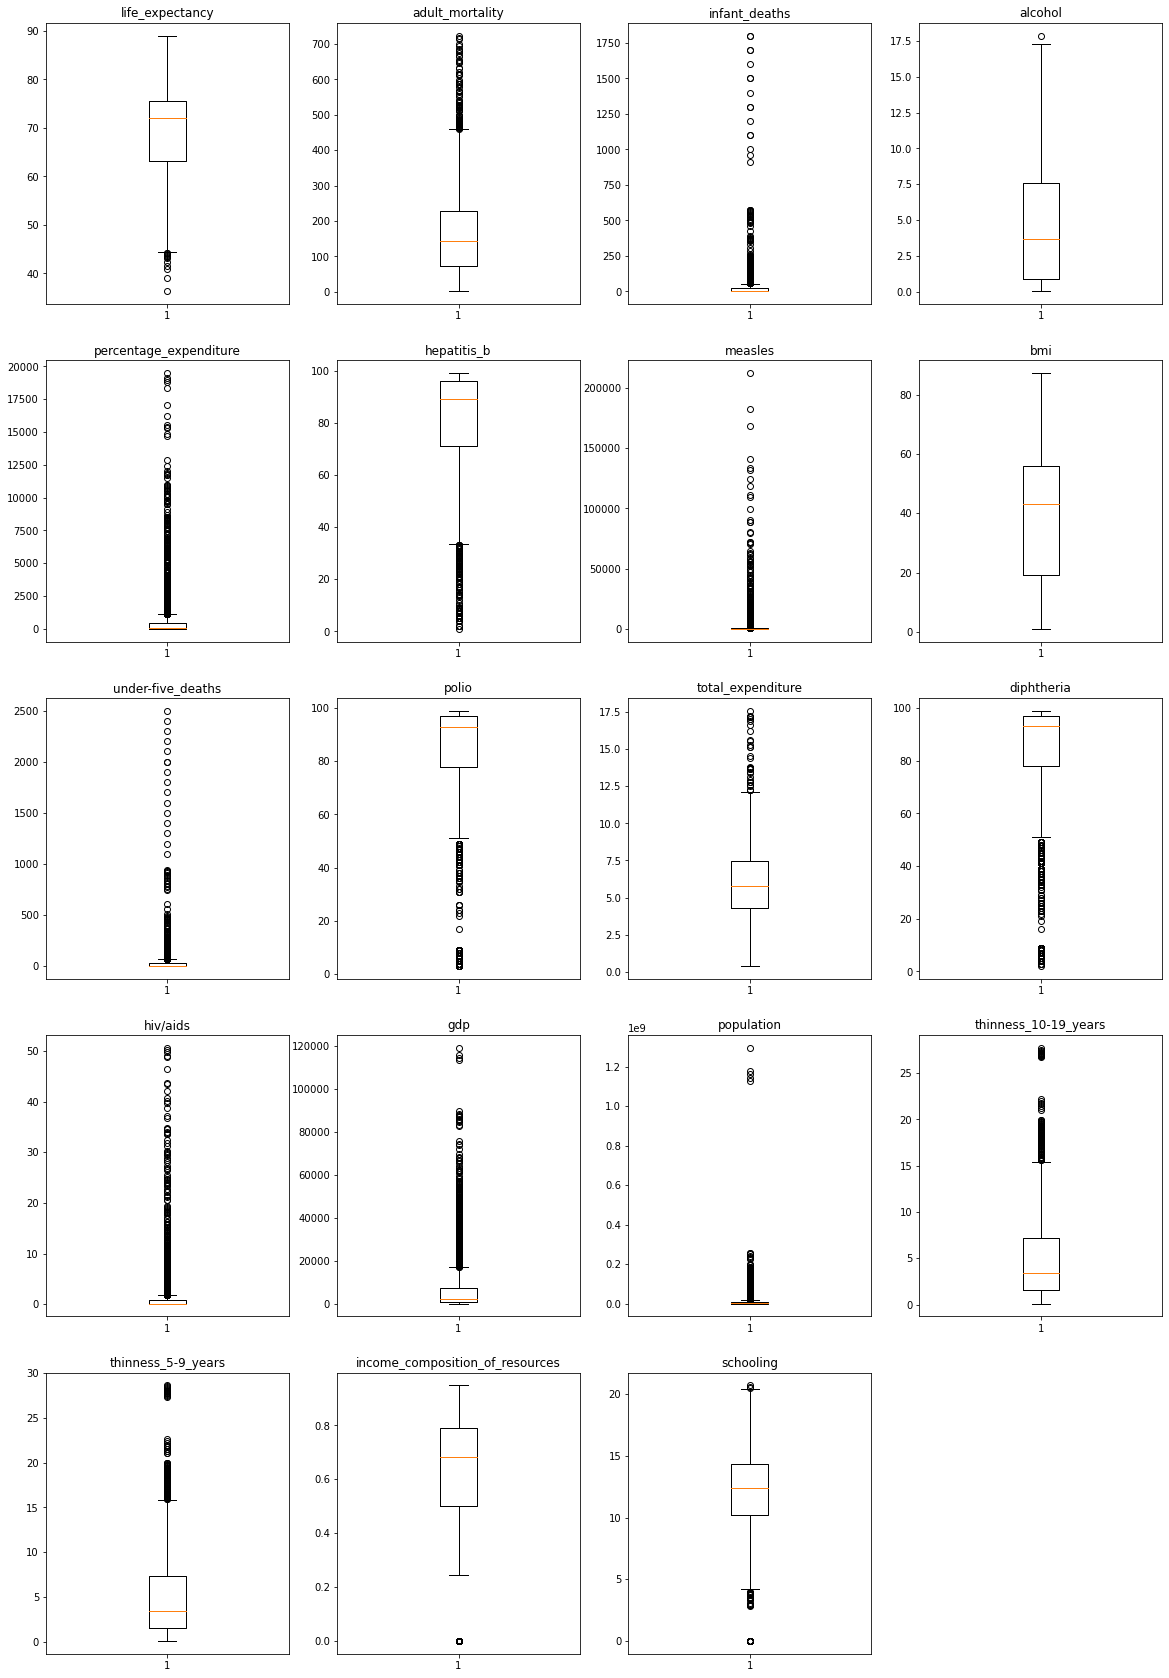

In [22]:
# Deal with outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(20,30))
for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(data1[variable],whis=1.5)
                     plt.title(variable)
plt.show()

In [23]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(data1[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
          len((np.where((data1[variable] > max_val) | (data1[variable] < min_val))[0])),
          len((np.where((data1[variable] > max_val) | (data1[variable] < min_val))[0]))*100/len(data1)))

Number of outliers and percentage of it in life_expectancy : 12 and 0.4084411164057182
Number of outliers and percentage of it in adult_mortality : 82 and 2.791014295439074
Number of outliers and percentage of it in infant_deaths : 315 and 10.721579305650103
Number of outliers and percentage of it in alcohol : 1 and 0.03403675970047652
Number of outliers and percentage of it in percentage_expenditure : 389 and 13.240299523485364
Number of outliers and percentage of it in hepatitis_b : 248 and 8.441116405718176
Number of outliers and percentage of it in measles : 542 and 18.44792375765827
Number of outliers and percentage of it in bmi : 0 and 0.0
Number of outliers and percentage of it in under-five_deaths : 394 and 13.410483321987746
Number of outliers and percentage of it in polio : 282 and 9.598366235534376
Number of outliers and percentage of it in total_expenditure : 35 and 1.191286589516678
Number of outliers and percentage of it in diphtheria : 301 and 10.245064669843432
Number o

In [24]:
# Remove Outliers in the variables using Winsorization technique
# bmi has no outliers, hence no winsorization conducted for this column
from scipy.stats.mstats import winsorize
winsorized_life_expectancy = winsorize(data1['life_expectancy'],(0.01,0))
winsorized_adult_mortality = winsorize(data1['adult_mortality'],(0,0.03))
winsorized_infant_deaths = winsorize(data1['infant_deaths'],(0,0.11))
winsorized_alcohol = winsorize(data1['alcohol'],(0,0.01))
winsorized_percentage_expenditure = winsorize(data1['percentage_expenditure'],(0,0.14))
winsorized_hepatitis_b = winsorize(data1['hepatitis_b'],(0.09,0))
winsorized_measles = winsorize(data1['measles'],(0,0.19))
winsorized_under_five_deaths = winsorize(data1['under-five_deaths'],(0,0.14))
winsorized_polio = winsorize(data1['polio'],(0.10,0))
winsorized_total_expenditure = winsorize(data1['total_expenditure'],(0,0.02))
winsorized_diphtheria = winsorize(data1['diphtheria'],(0.11,0))
winsorized_hivoraids = winsorize(data1['hiv/aids'],(0,0.19))
winsorized_gdp = winsorize(data1['gdp'],(0,0.12))
winsorized_population = winsorize(data1['population'],(0,0.13))
winsorized_thinness_10to19_years = winsorize(data1['thinness_10-19_years'],(0,0.04))
winsorized_thinness_5to9_years = winsorize(data1['thinness_5-9_years'],(0,0.04))
winsorized_income_composition_of_resources = winsorize(data1['income_composition_of_resources'],(0.05,0))
winsorized_schooling = winsorize(data1['schooling'],(0.02,0.01))

In [25]:
data1['winsorized_life_expectancy'] = winsorized_life_expectancy
data1['winsorized_adult_mortality'] = winsorized_adult_mortality
data1['winsorized_infant_deaths'] = winsorized_infant_deaths
data1['winsorized_alcohol'] = winsorized_alcohol
data1['winsorized_percentage_expenditure'] = winsorized_percentage_expenditure
data1['winsorized_hepatitis_b'] = winsorized_hepatitis_b
data1['winsorized_measles'] = winsorized_measles
data1['winsorized_under-five_deaths'] = winsorized_under_five_deaths
data1['winsorized_polio'] = winsorized_polio
data1['winsorized_total_expenditure'] = winsorized_total_expenditure
data1['winsorized_diphtheria'] = winsorized_diphtheria
data1['winsorized_hiv/aids'] = winsorized_hivoraids
data1['winsorized_gdp'] = winsorized_gdp
data1['winsorized_population'] = winsorized_population
data1['winsorized_thinness_10-19_years'] = winsorized_thinness_10to19_years
data1['winsorized_thinness_5-9_years'] = winsorized_thinness_5to9_years
data1['winsorized_income_composition_of_resources'] = winsorized_income_composition_of_resources
data1['winsorized_schooling'] = winsorized_schooling

In [26]:
adj_col_dict = {'winsorized_life_expectancy':1, 'winsorized_adult_mortality':2, 'winsorized_infant_deaths':3,
                'winsorized_alcohol':4, 'winsorized_percentage_expenditure':5, 'winsorized_hepatitis_b':6,
                'winsorized_measles':7, 'bmi':8, 'winsorized_under-five_deaths':9, 'winsorized_polio':10, 
                'winsorized_total_expenditure':11,'winsorized_diphtheria':12, 
                'winsorized_hiv/aids':13, 'winsorized_gdp':14, 'winsorized_population':15,
                'winsorized_thinness_10-19_years' :16, 'winsorized_thinness_5-9_years' :17,
                'winsorized_income_composition_of_resources':18, 'winsorized_schooling':19}
for variable in adj_col_dict.keys():
    q75, q25 = np.percentile(data1[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers after winsorization in {} : {} ".format(variable,
        len(np.where((data1[variable] > max_val) | (data1[variable]< min_val))[0])))

Number of outliers after winsorization in winsorized_life_expectancy : 0 
Number of outliers after winsorization in winsorized_adult_mortality : 0 
Number of outliers after winsorization in winsorized_infant_deaths : 0 
Number of outliers after winsorization in winsorized_alcohol : 0 
Number of outliers after winsorization in winsorized_percentage_expenditure : 0 
Number of outliers after winsorization in winsorized_hepatitis_b : 0 
Number of outliers after winsorization in winsorized_measles : 0 
Number of outliers after winsorization in bmi : 0 
Number of outliers after winsorization in winsorized_under-five_deaths : 0 
Number of outliers after winsorization in winsorized_polio : 0 
Number of outliers after winsorization in winsorized_total_expenditure : 0 
Number of outliers after winsorization in winsorized_diphtheria : 0 
Number of outliers after winsorization in winsorized_hiv/aids : 0 
Number of outliers after winsorization in winsorized_gdp : 0 
Number of outliers after winsori

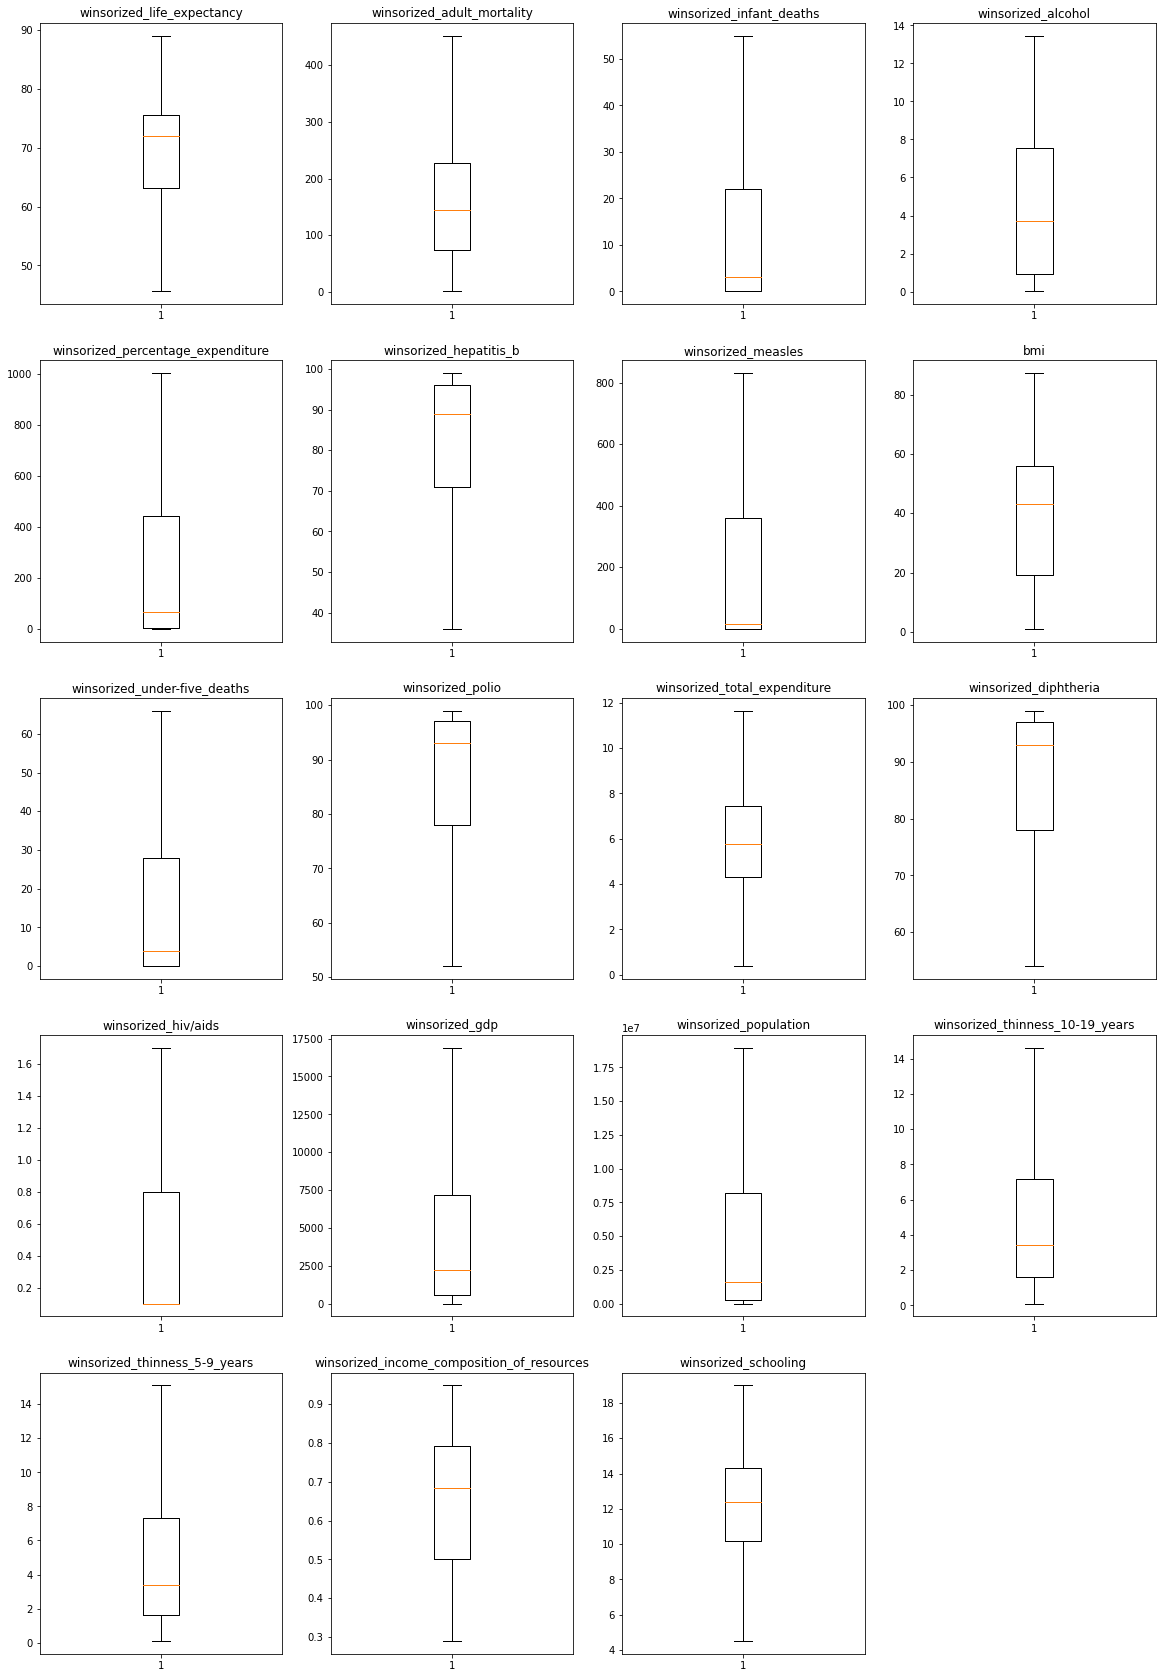

In [27]:
# Boxplot after winsorization
plt.figure(figsize=(20,30))
for variable,i in adj_col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(data1[variable],whis=1.5)
                     plt.title(variable)
plt.show()

### Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation between different features')

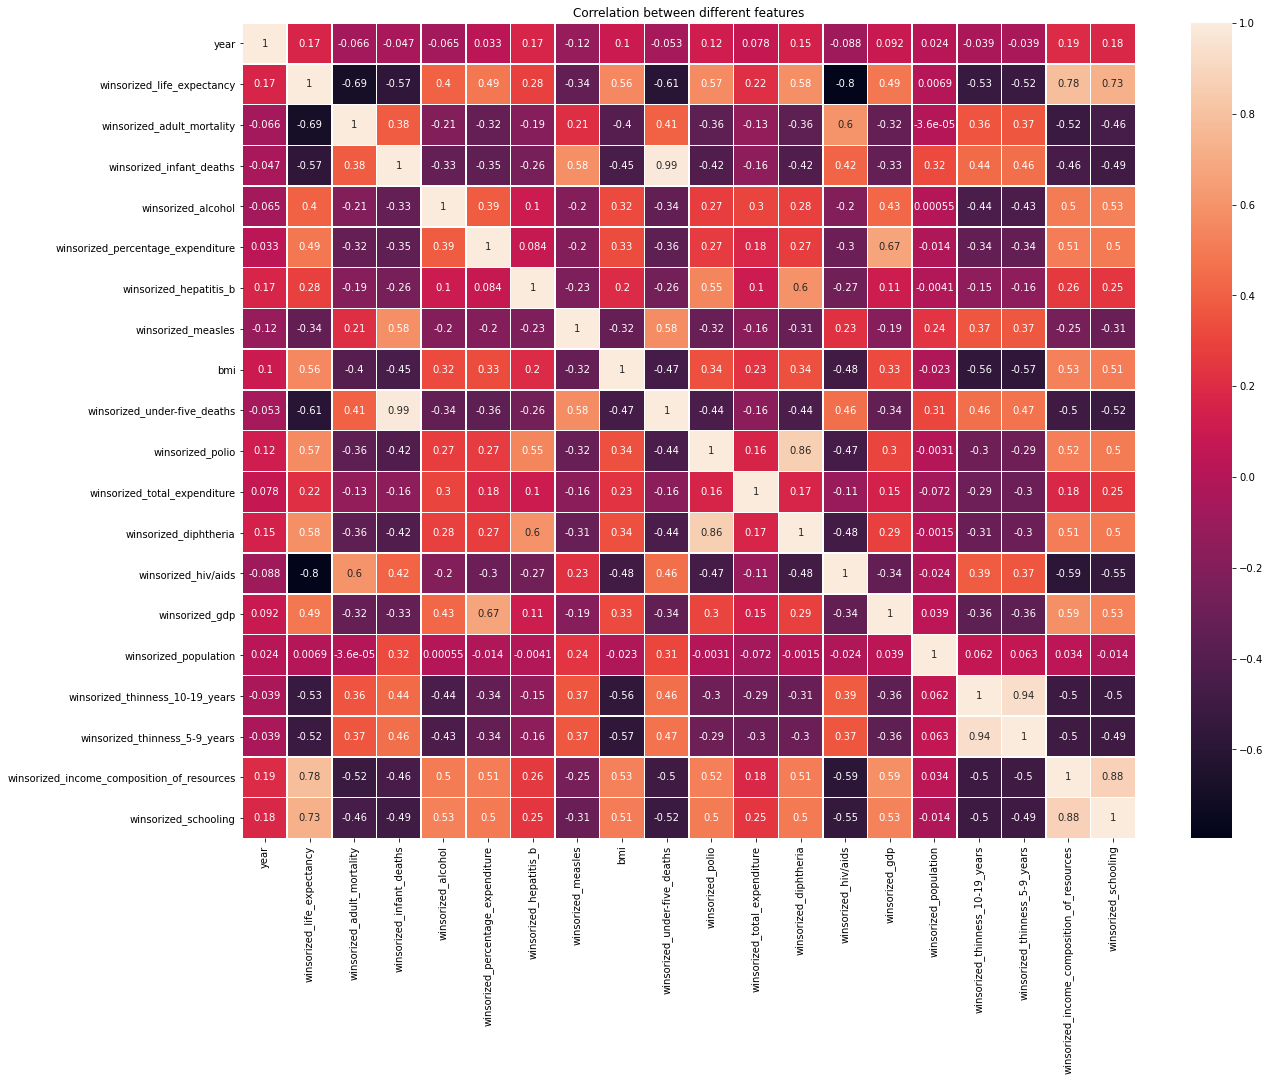

In [28]:
# Plot a heatmap showing correlation between predicting variables 
import seaborn as sns 
adj_corr = data1[['year', 'status', 'country', 'region','winsorized_life_expectancy', 'winsorized_adult_mortality', 
                  'winsorized_infant_deaths','winsorized_alcohol', 'winsorized_percentage_expenditure', 
                  'winsorized_hepatitis_b','winsorized_measles', 'bmi', 'winsorized_under-five_deaths', 
                  'winsorized_polio','winsorized_total_expenditure','winsorized_diphtheria', 'winsorized_hiv/aids',
                  'winsorized_gdp', 'winsorized_population',
                  'winsorized_thinness_10-19_years', 'winsorized_thinness_5-9_years',
                  'winsorized_income_composition_of_resources', 'winsorized_schooling']].corr()

plt.figure(figsize=(20,15))
sns.heatmap(adj_corr, linewidths=.5, annot=True)
plt.title('Correlation between different features')

In [29]:
# Calculate the correlation
import statsmodels.formula.api as smf
results = smf.ols('winsorized_life_expectancy ~ winsorized_alcohol', data=data1).fit()

def corr(data, col1, col2):
    a = data[col1].corr(data1[col2])
    if a > 0:
        print(col2 + ' has a positive correlation with ' + col1 +': '+ str(a))
    else:
        print(col2 + ' has a negative correlation with ' + col1 +': '+ str(a))

corr(data1, 'winsorized_life_expectancy','winsorized_adult_mortality')
corr(data1, 'winsorized_life_expectancy','winsorized_infant_deaths')
corr(data1, 'winsorized_life_expectancy','winsorized_alcohol')
corr(data1, 'winsorized_life_expectancy','winsorized_percentage_expenditure')
corr(data1, 'winsorized_life_expectancy','winsorized_hepatitis_b')
corr(data1, 'winsorized_life_expectancy','winsorized_measles')
corr(data1, 'winsorized_life_expectancy','bmi') 
corr(data1, 'winsorized_life_expectancy','winsorized_under-five_deaths')
corr(data1, 'winsorized_life_expectancy','winsorized_polio')
corr(data1, 'winsorized_life_expectancy','winsorized_total_expenditure')
corr(data1, 'winsorized_life_expectancy','winsorized_diphtheria')
corr(data1, 'winsorized_life_expectancy','winsorized_hiv/aids')
corr(data1, 'winsorized_life_expectancy','winsorized_gdp')
corr(data1, 'winsorized_life_expectancy','winsorized_population') 
corr(data1, 'winsorized_life_expectancy','winsorized_thinness_10-19_years')
corr(data1, 'winsorized_life_expectancy','winsorized_thinness_5-9_years') 
corr(data1, 'winsorized_life_expectancy','winsorized_income_composition_of_resources')
corr(data1, 'winsorized_life_expectancy','winsorized_schooling') 

winsorized_adult_mortality has a negative correlation with winsorized_life_expectancy: -0.6900798171844281
winsorized_infant_deaths has a negative correlation with winsorized_life_expectancy: -0.5658646814243791
winsorized_alcohol has a positive correlation with winsorized_life_expectancy: 0.40388475860289397
winsorized_percentage_expenditure has a positive correlation with winsorized_life_expectancy: 0.48950977774033605
winsorized_hepatitis_b has a positive correlation with winsorized_life_expectancy: 0.28429845576796064
winsorized_measles has a negative correlation with winsorized_life_expectancy: -0.33659987548478026
bmi has a positive correlation with winsorized_life_expectancy: 0.5578109613968206
winsorized_under-five_deaths has a negative correlation with winsorized_life_expectancy: -0.6050533002382982
winsorized_polio has a positive correlation with winsorized_life_expectancy: 0.5700389849761407
winsorized_total_expenditure has a positive correlation with winsorized_life_expecta

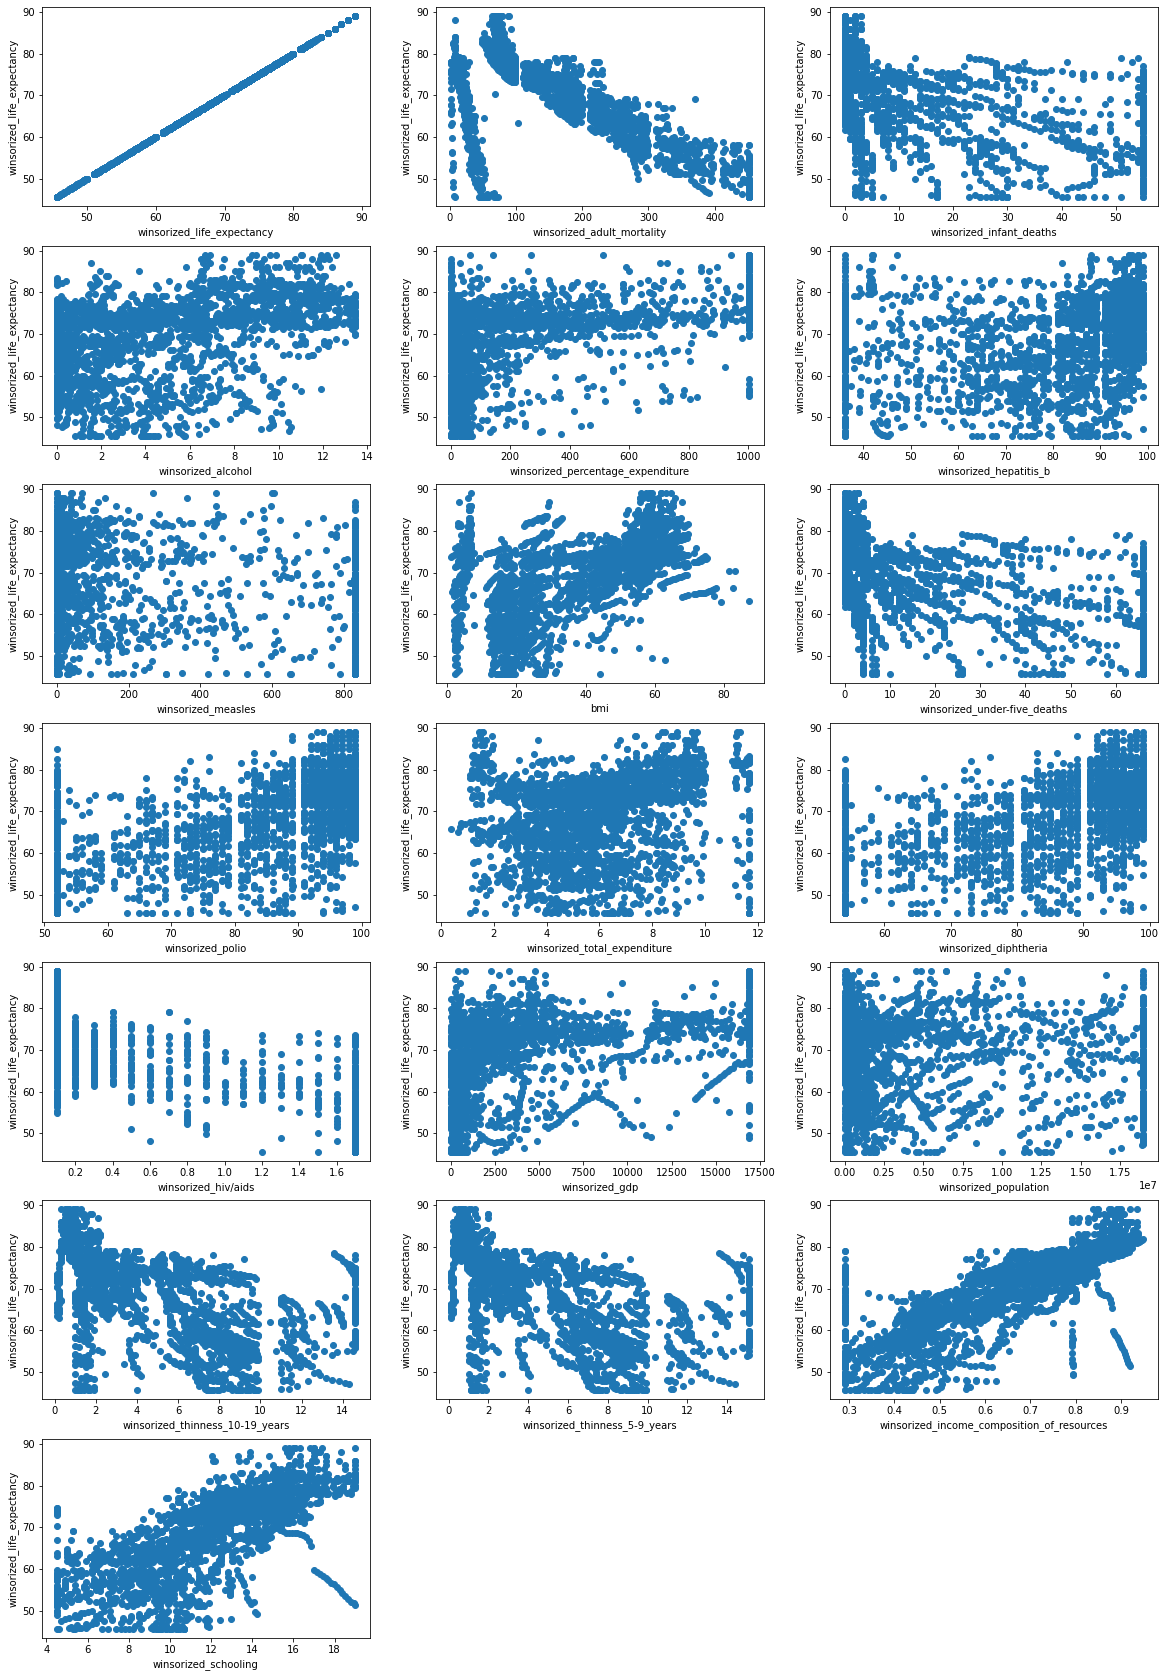

In [30]:
adj_cols = ['winsorized_life_expectancy', 'winsorized_adult_mortality', 
            'winsorized_infant_deaths','winsorized_alcohol', 'winsorized_percentage_expenditure', 
            'winsorized_hepatitis_b','winsorized_measles', 'bmi', 'winsorized_under-five_deaths', 
            'winsorized_polio','winsorized_total_expenditure','winsorized_diphtheria', 'winsorized_hiv/aids', 
            'winsorized_gdp', 'winsorized_population',
            'winsorized_thinness_10-19_years', 'winsorized_thinness_5-9_years',
            'winsorized_income_composition_of_resources', 'winsorized_schooling']
plt.figure(figsize=(20,30))

# Plot each feature in function of the target variable (life_expectancy) using scatter plots.
for i in range(len(adj_cols)):
    plt.subplot(7,3,i+1)
    plt.scatter(data1[adj_cols[i]], data1['winsorized_life_expectancy'])
    plt.xlabel(adj_cols[i])
    plt.ylabel('winsorized_life_expectancy')

plt.show()

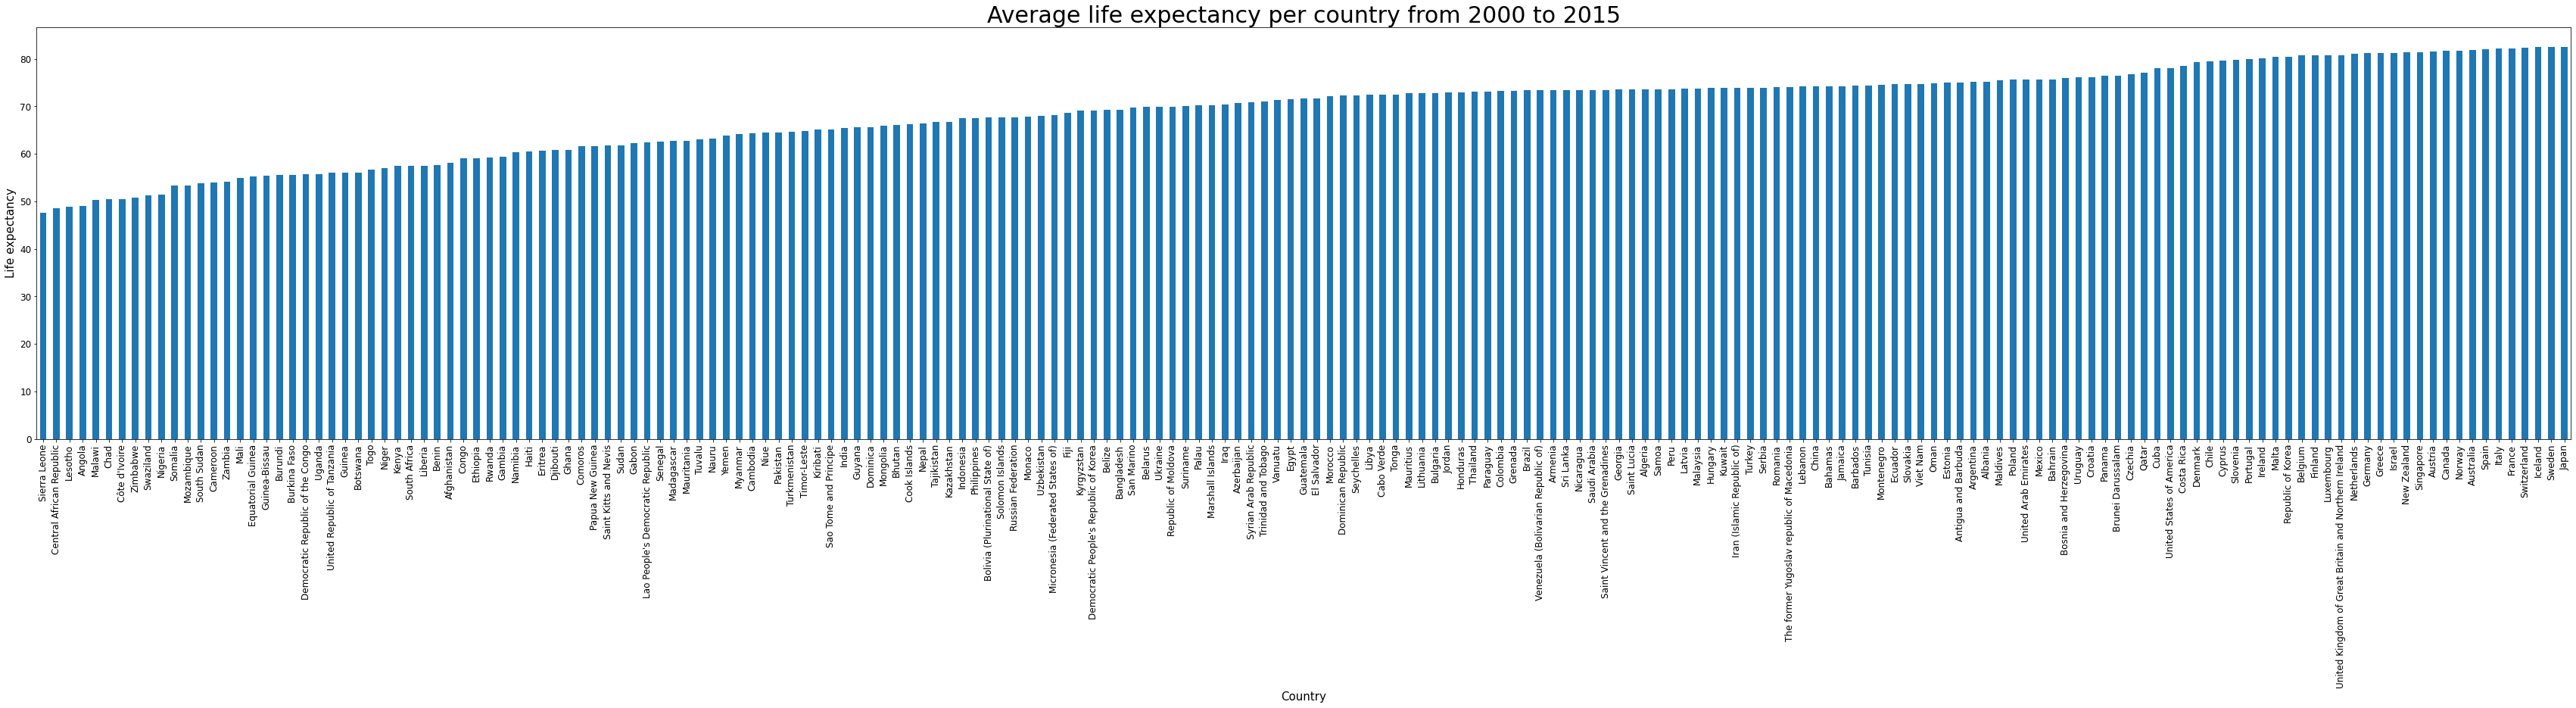

In [31]:
life_expectancy_per_country = data1.groupby('country')['winsorized_life_expectancy'].mean().sort_values(ascending=True)
life_expectancy_per_country.to_csv('/Users/jiangyijia/life_expectancy_per_country.csv')
life_expectancy_per_country.plot(kind='bar', figsize=(60,10), fontsize=12)
plt.title("Average life expectancy per country from 2000 to 2015",fontsize=30)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Life expectancy",fontsize=15)
plt.show()

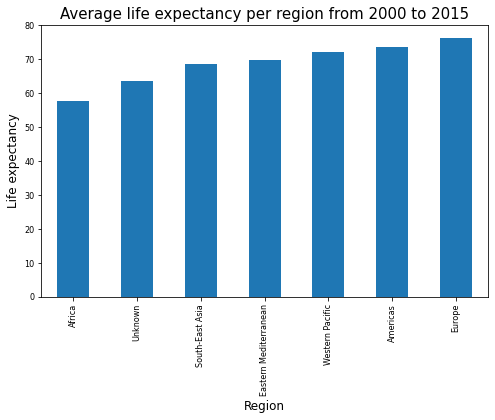

In [32]:
life_expectancy_per_region = data1.groupby('region')['winsorized_life_expectancy'].mean().sort_values(ascending=True)
life_expectancy_per_region.plot(kind='bar', figsize=(8,5), fontsize=8)
plt.title("Average life expectancy per region from 2000 to 2015",fontsize=15)
plt.xlabel("Region",fontsize=12)
plt.ylabel("Life expectancy",fontsize=12)
plt.show()

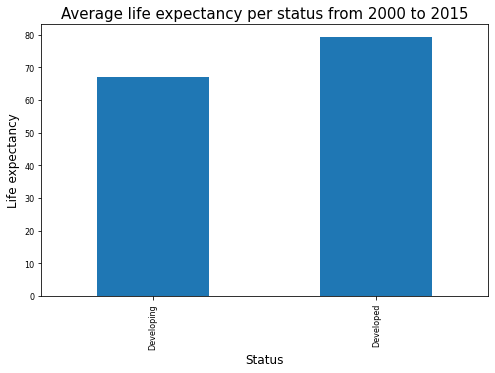

In [33]:
life_expectancy_per_status = data1.groupby('status')['winsorized_life_expectancy'].mean().sort_values(ascending=True)
life_expectancy_per_status.plot(kind='bar', figsize=(8,5), fontsize=8)
plt.title("Average life expectancy per status from 2000 to 2015",fontsize=15)
plt.xlabel("Status",fontsize=12)
plt.ylabel("Life expectancy",fontsize=12)
plt.show()

/Users/jiangyijia/opt/anaconda3/envs/CW2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


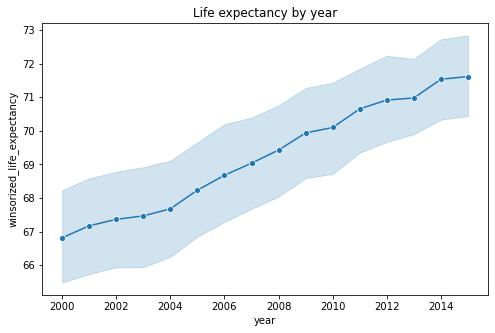

In [34]:
# Year vs Life Expectancy
plt.subplots(figsize=(8,5))
sns.lineplot('year','winsorized_life_expectancy',data=data1,marker="o")
plt.title('Life expectancy by year')
plt.show()

<Figure size 432x288 with 0 Axes>

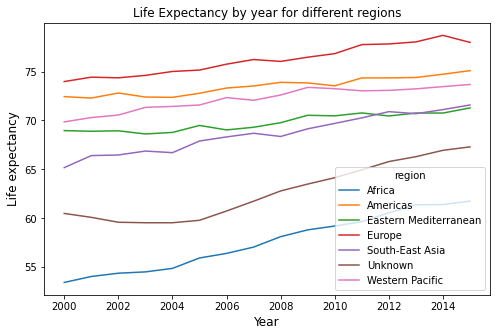

In [35]:
data1_region = data1.groupby(['year','region'])['winsorized_life_expectancy'].mean().unstack()
plt.figure()
data1_region.plot(kind='line',figsize=(8,5))
plt.title('Life Expectancy by year for different regions')
plt.xlabel("Year",fontsize=12)
plt.ylabel("Life expectancy",fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

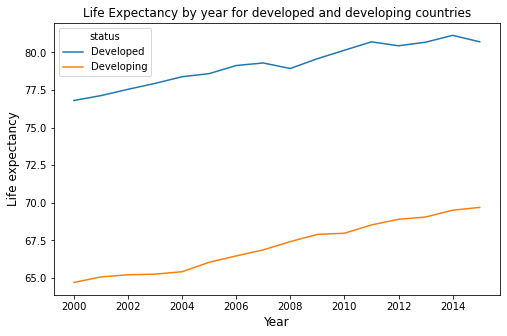

In [36]:
data1_status = data1.groupby(['year','status'])['winsorized_life_expectancy'].mean().unstack()
plt.figure()
data1_status.plot(figsize=(8,5))
plt.title('Life Expectancy by year for developed and developing countries')
plt.xlabel("Year",fontsize=12)
plt.ylabel("Life expectancy",fontsize=12)
plt.show()

In [38]:
# Finding the significance of difference of Average_Life_Expectancy between Developed and Developing countries using 
# t-test
import scipy.stats as stats
stats.ttest_ind(data1.loc[data1['status']=='Developed','winsorized_life_expectancy'],
                data1.loc[data1['status']=='Developing','winsorized_life_expectancy'])

Ttest_indResult(statistic=29.95462938660176, pvalue=2.9323745212760544e-172)

p value is < 0.05. Hence, the difference of Average_Life_Expectancy between Developed and Developing countries is significant. We can consider 'Status' as a feature as it is related to Life Expectancy.

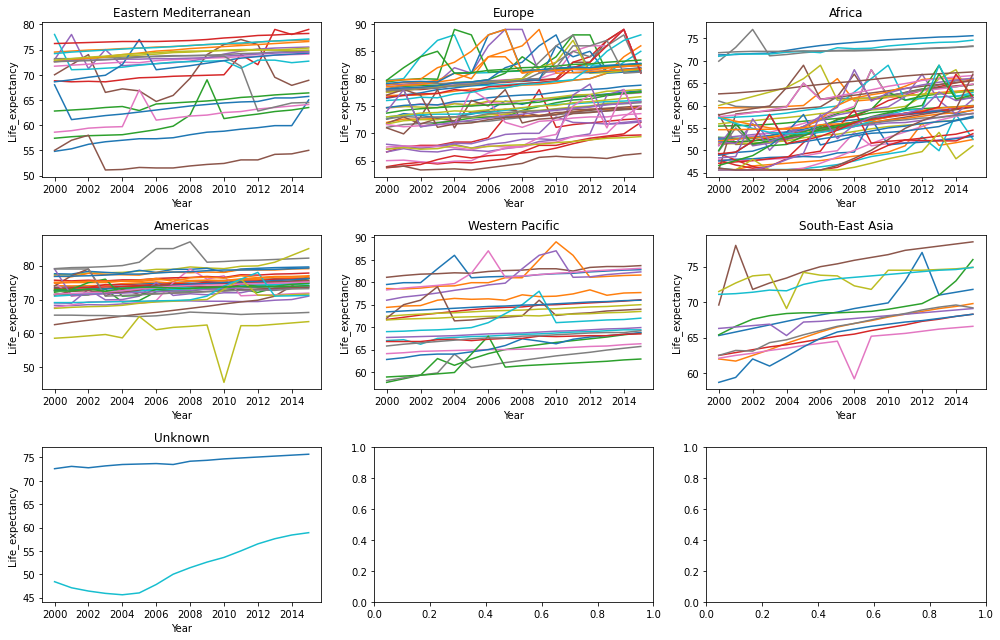

In [39]:
region_names = data1['region'].unique()
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(14.0, 9.0)
for ireg, region in enumerate(region_names):
    ix = ireg//3
    iy = ireg%3
    axs[ix, iy].set_title(region)
    temp_df = data1[data1['region'] == region]
    for country in temp_df['country'].unique():
        axs[ix, iy].plot(temp_df[temp_df['country']==country].year, temp_df[temp_df['country']==country].winsorized_life_expectancy)
    axs[ix, iy].set_xlabel("Year")
    axs[ix, iy].set_ylabel("Life_expectancy")
plt.tight_layout()
plt.show()

### Model construction and evaluation

In [40]:
df = data1.loc[:,['status','winsorized_life_expectancy','winsorized_adult_mortality', 
                  'winsorized_infant_deaths','winsorized_alcohol', 'winsorized_percentage_expenditure', 
                  'winsorized_hepatitis_b','winsorized_measles', 'bmi', 'winsorized_under-five_deaths', 
                  'winsorized_polio','winsorized_total_expenditure','winsorized_diphtheria', 'winsorized_hiv/aids', 
                  'winsorized_gdp', 'winsorized_population',
                  'winsorized_thinness_10-19_years', 'winsorized_thinness_5-9_years',
                  'winsorized_income_composition_of_resources', 'winsorized_schooling']]

In [41]:
status = pd.get_dummies(df.status)
df = pd.concat([df, status], axis = 1)
df= df.drop(['status'], axis=1)
df.rename(columns = lambda x: x.strip().replace(' ', '_').lower(), inplace=True)
df

,winsorized_life_expectancy,winsorized_adult_mortality,winsorized_infant_deaths,winsorized_alcohol,winsorized_percentage_expenditure,winsorized_hepatitis_b,winsorized_measles,bmi,winsorized_under-five_deaths,winsorized_polio,...,winsorized_diphtheria,winsorized_hiv/aids,winsorized_gdp,winsorized_population,winsorized_thinness_10-19_years,winsorized_thinness_5-9_years,winsorized_income_composition_of_resources,winsorized_schooling,developed,developing
0,65.0,263.0,55,0.01,71.279624,65.0,831,19.1,66,52.0,...,65.0,0.1,584.259210,18938762.0,14.605882,15.1,0.479,10.1,0,1
1,59.9,271.0,55,0.01,73.523582,62.0,492,18.6,66,58.0,...,62.0,0.1,612.696514,327582.0,14.605882,15.1,0.476,10.0,0,1
2,59.9,268.0,55,0.01,73.219243,64.0,430,18.1,66,62.0,...,64.0,0.1,631.744976,18938762.0,14.605882,15.1,0.470,9.9,0,1
3,59.5,272.0,55,0.01,78.184215,67.0,831,17.6,66,67.0,...,67.0,0.1,669.959000,3696958.0,14.605882,15.1,0.463,9.8,0,1
4,59.2,275.0,55,0.01,7.097109,68.0,831,17.2,66,68.0,...,68.0,0.1,63.537231,2978599.0,14.605882,15.1,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,45.6,452.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,65.0,1.7,454.366654,12777511.0,9.400000,9.4,0.407,9.2,0,1
2934,45.6,452.0,26,4.06,0.000000,36.0,831,26.7,41,52.0,...,68.0,1.7,453.351155,12633897.0,9.800000,9.9,0.418,9.5,0,1
2935,45.6,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,71.0,1.7,57.348340,125525.0,1.200000,1.3,0.427,10.0,0,1
2936,45.6,452.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,75.0,1.7,548.587312,12366165.0,1.600000,1.7,0.427,9.8,0,1


In [42]:
# dividing our data
y=df['winsorized_life_expectancy']
x=df.drop('winsorized_life_expectancy',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from statsmodels.tools.eval_measures import mse, rmse
def fitter_metrics(y_actual, y_pred):
    plt.scatter(y_actual, y_pred)
    plt.plot(y_actual, y_actual, color="red")
    plt.xlabel("true values")
    plt.ylabel("predicted values")
    plt.title("Life expectancy: true and predicted values")
    plt.show()

    print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_actual, y_pred)))
    print("Mean squared error of the prediction is: {}".format(mse(y_actual, y_pred)))
    print("Root mean squared error of the prediction is: {}".format(rmse(y_actual, y_pred)))
    print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100))
    print("R2 score of the prediction is: {}".format(r2_score(y_actual, y_pred)))

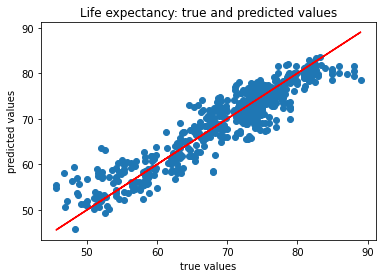

Mean absolute error of the prediction is: 2.4955021857609654
Mean squared error of the prediction is: 10.86080330840361
Root mean squared error of the prediction is: 3.295573289793994
Mean absolute percentage error of the prediction is: 3.7438606749650503
R2 score of the prediction is: 0.8686900289473909


In [44]:
# Linear regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
y_pred = linear_reg.predict(X_test)
fitter_metrics(y_test,y_pred)

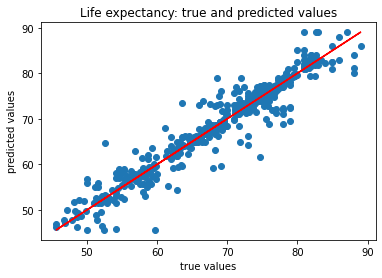

Mean absolute error of the prediction is: 1.4650510204081633
Mean squared error of the prediction is: 6.3893579931972795
Root mean squared error of the prediction is: 2.5277179417801503
Mean absolute percentage error of the prediction is: 2.1975484161690413
R2 score of the prediction is: 0.9227509798946161


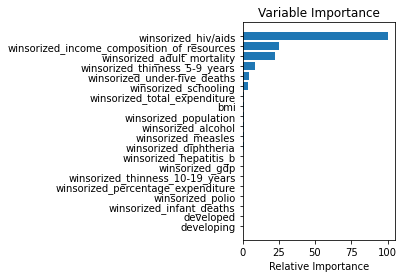

In [45]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)
y_pred = tree_reg.predict(X_test)
fitter_metrics(y_test,y_pred)

feature_importance = tree_reg.feature_importances_
# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

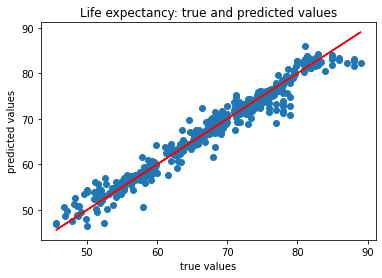

Mean absolute error of the prediction is: 1.103323129251703
Mean squared error of the prediction is: 2.9789393767006813
Root mean squared error of the prediction is: 1.7259604215336692
Mean absolute percentage error of the prediction is: 1.6438302715889177
R2 score of the prediction is: 0.9639838387442872


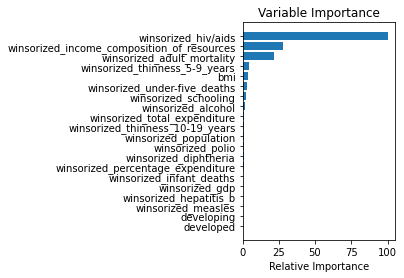

In [46]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,y_train)
y_pred = forest_reg.predict(X_test)
fitter_metrics(y_test,y_pred)

feature_importance = forest_reg.feature_importances_
# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

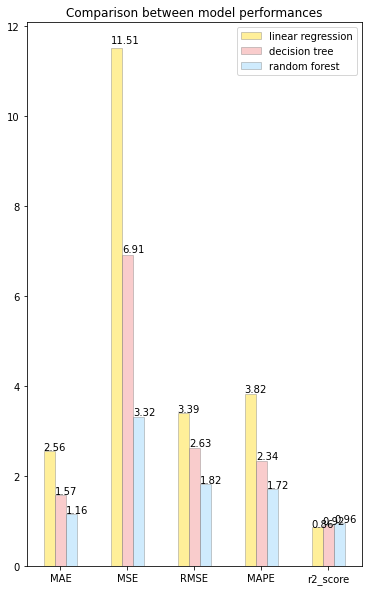

In [47]:
models_metrics = {'linear regression': [2.56, 11.51, 3.39, 3.82, 0.86], 
                  'decision tree': [1.57, 6.91, 2.63, 2.34, 0.92],
                  'random forest' : [1.16, 3.32, 1.82, 1.72, 0.96]}
df_performance = pd.DataFrame(data = models_metrics)
df_performance.rename(index={0:'MAE',1:'MSE', 2: 'RMSE',3:'MAPE',4:'r2_score'}, inplace=True)
ax = df_performance.plot(kind='bar', figsize = (6,10),
                         color = ['gold', 'lightcoral', 'lightskyblue'],
                         rot = 0, title ='Comparison between model performances',
                         edgecolor = 'grey', alpha = 0.4)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.0005, p.get_height() * 1.01))
plt.show()

PCA (Principal Component Analysis)

In [49]:
from sklearn.preprocessing import StandardScaler
# Normalize the data.
x_std= StandardScaler().fit_transform(x)
mean_vec = np.mean(x_std, axis=0)
# Compute covariance matrix.
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec)) / (x_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
# Compute eigenvalues and eigenvectors.
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
# Compute the variance for every eigenvalue.
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
var_exp

Covariance matrix 
[[ 1.00034048e+00  3.83889144e-01 -2.06178477e-01 -3.22196746e-01
  -1.89875483e-01  2.12003734e-01 -3.95573935e-01  4.09621938e-01
  -3.56974517e-01 -1.31557363e-01 -3.60156284e-01  6.01943515e-01
  -3.21333865e-01 -3.55978952e-05  3.58746715e-01  3.65704272e-01
  -5.18223496e-01 -4.60243148e-01 -3.27489276e-01  3.27489276e-01]
 [ 3.83889144e-01  1.00034048e+00 -3.30503580e-01 -3.47696420e-01
  -2.55107776e-01  5.81730320e-01 -4.48523383e-01  9.93090281e-01
  -4.22973784e-01 -1.57491491e-01 -4.20880007e-01  4.16505814e-01
  -3.31303012e-01  3.24785461e-01  4.43023972e-01  4.58699899e-01
  -4.59179507e-01 -4.87506749e-01 -2.92031004e-01  2.92031004e-01]
 [-2.06178477e-01 -3.30503580e-01  1.00034048e+00  3.85546808e-01
   1.02743185e-01 -1.97189883e-01  3.20583421e-01 -3.41527627e-01
   2.73696481e-01  3.00872496e-01  2.80016414e-01 -2.02671950e-01
   4.27312076e-01  5.49004912e-04 -4.43098592e-01 -4.32329773e-01
   5.04474832e-01  5.25194944e-01  5.90453041e-01 -5.90

[39.839177987464566,
 10.610940173333157,
 8.515768645969054,
 6.254056031162509,
 5.924735455792096,
 4.5314266764132825,
 3.8876078692580793,
 3.298550297199627,
 3.0560924708239265,
 2.5312422519402915,
 2.4212172156306546,
 2.2475312399865723,
 2.017447441316663,
 1.7546913329342755,
 1.5665400263393279,
 0.6824026695831507,
 0.5561360559296296,
 0.2756916744262717,
 0.028744484496847352,
 3.202352856914891e-32]

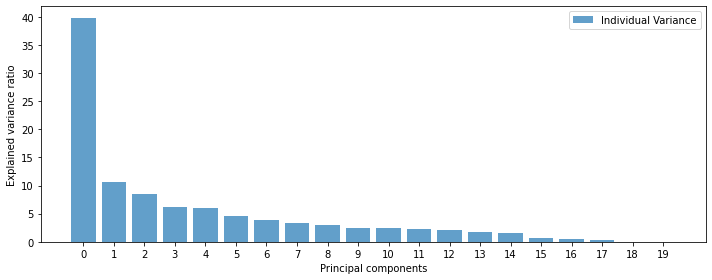

In [50]:
# Plot the principal components.
plt.figure(figsize=(10,4))
plt.bar(range(20), var_exp, alpha=0.7, align='center', label='Individual Variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.xticks(np.arange(0, 20, 1.0))
plt.tight_layout()

([<matplotlib.axis.XTick at 0x7f8be8825a30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

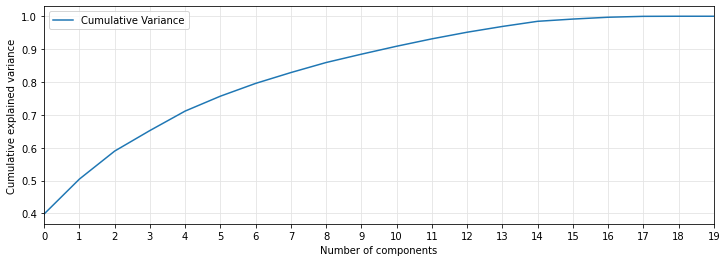

In [51]:
from sklearn.decomposition import PCA
# Plot the cumulative variance.
pca = PCA().fit(x_std)
plt.figure(figsize=(12, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Cumulative Variance')
plt.xlim(0,19,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.legend(loc='best')
plt.grid(color='#E3E3E3')
plt.xticks(np.arange(0, 20, 1.0))

We see here that the top 5 components of the PCA explain approximately 75% of the variance in our data. 